# The social aspect of  cryptocurrencies
This will analyze different cryptocurrencies in order to get insight into ROI, country of origin, and number of exchanges listed


### How does exchange listing affect the price of a coin?
#### Will coins listed in more exchanges have a higher appreciation in price?


### From the top 100 coins, how many coins have appreciated double digits? triple? quadruple?

### Does country of origin affect price of coin?


### What is the relationship between market cap and percentage gains in the last 3 years?

### How has internet interactions changed over the last 3 years for cryptocurrencies?

#### Look at twitter followers for accounts, re

In [185]:
%matplotlib notebook

In [186]:
#import dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from matplotlib import pyplot as plt
import emoji

In [188]:
print(emoji.emojize(f'hello :thumbs_up:'))

hello 👍


In [189]:
# Find an API that has information on coin
base_url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=300&page=1&sparkline=false"
print(base_url)
response_json = requests.get(base_url).json()


https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&per_page=300&page=1&sparkline=false


In [190]:
# Checkout the response

response_json

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 51289,
  'market_cap': 956180902432,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1074425984368,
  'total_volume': 78019950997,
  'high_24h': 55474,
  'low_24h': 50983,
  'price_change_24h': -3112.5365651,
  'price_change_percentage_24h': -5.72139,
  'market_cap_change_24h': -65483916429.61841,
  'market_cap_change_percentage_24h': -6.40953,
  'circulating_supply': 18688862.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 64805,
  'ath_change_percentage': -21.1459,
  'ath_date': '2021-04-14T11:54:46.763Z',
  'atl': 67.81,
  'atl_change_percentage': 75260.47226,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2021-04-23T01:36:59.768Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.

In [191]:
# create empty list to hold cryptocurrencies
crypto_currencies = []

In [192]:
crypto_currencies.append(response_json)

In [193]:
crypto_currencies[0]

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 51289,
  'market_cap': 956180902432,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 1074425984368,
  'total_volume': 78019950997,
  'high_24h': 55474,
  'low_24h': 50983,
  'price_change_24h': -3112.5365651,
  'price_change_percentage_24h': -5.72139,
  'market_cap_change_24h': -65483916429.61841,
  'market_cap_change_percentage_24h': -6.40953,
  'circulating_supply': 18688862.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 64805,
  'ath_change_percentage': -21.1459,
  'ath_date': '2021-04-14T11:54:46.763Z',
  'atl': 67.81,
  'atl_change_percentage': 75260.47226,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2021-04-23T01:36:59.768Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/large/ethereum.

In [194]:
# make main data frame to work on
crypto_df = pd.DataFrame(crypto_currencies[0])
crypto_df = crypto_df[['id', 'symbol', 'current_price','market_cap', 'market_cap_rank', 'ath', 'ath_change_percentage', 'ath_date','atl', 'atl_change_percentage', 'atl_date']]
crypto_df['market_cap'] = crypto_df['market_cap']/1000000000

# Rename columns to see easier
crypto_df.rename(columns={'market_cap':'market_cap_billion(2021)',
                          'current_price' : 'price_04-22-21'
                          
                         }, inplace=True)
crypto_df.head()

,id,symbol,price_04-22-21,market_cap_billion(2021),market_cap_rank,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date
0,bitcoin,btc,51289.00000,956.180902,1,64805.00,-21.14590,2021-04-14T11:54:46.763Z,67.810000,7.526047e+04,2013-07-06T00:00:00.000Z
1,ethereum,eth,2349.63000,271.333046,2,2640.37,-10.96228,2021-04-22T16:34:50.091Z,0.432979,5.428650e+05,2015-10-20T00:00:00.000Z
2,binancecoin,bnb,493.53000,76.206681,3,610.06,-18.65756,2021-04-12T09:32:32.635Z,0.039818,1.246165e+06,2017-10-19T00:00:00.000Z
3,ripple,xrp,1.14000,52.377339,4,3.40,-66.08048,2018-01-07T00:00:00.000Z,0.002686,4.281323e+04,2014-05-22T00:00:00.000Z
4,tether,usdt,0.99531,49.191076,5,1.32,-24.77415,2018-07-24T00:00:00.000Z,0.572521,7.384683e+01,2015-03-02T00:00:00.000Z


In [195]:
# Get each coin's price on 01-04-2018 to now
# Make empty list to hold the value of coins

coin_data_2018 = []

target_date = "01-04-2018"

# Define function so we can use same code to get requests for different dates
def obtain_metrics_by_date (target_list = coin_data_2018, date='01-04-2018'):
    # Make for loop to perform multiple request getting data utilizing the existing data frame as guide
    
    for index, row in crypto_df.iterrows():
        target_coin = row['id']
        print(f"Processing {target_coin}")


        try:
            # build url
            price_url = f"https://api.coingecko.com/api/v3/coins/{target_coin}/history?date={date}localization=False"
            print(price_url)
            # save json respons
            response_json = requests.get(price_url).json()
            # traverse json getting specific data
            coin_id = response_json['id']
            coin_price = response_json['market_data']['current_price']['usd']
            coin_reddit_subscribers = response_json['community_data']['reddit_subscribers']
            coin_twitter_followers = response_json['community_data']['twitter_followers']
            coin_alexa_rank = response_json['public_interest_stats']['alexa_rank']
            # Add data to empty list in dictionary style
            target_list.append({
                "id" : coin_id,
                f"price {date}" : coin_price,
                f"reddit_subscribers {date}" : coin_reddit_subscribers,
                f"twitter_followers {date}" : coin_twitter_followers,
                f"alexa_rank {date}" : coin_alexa_rank
                   })
        except :
            print("coin information not found... skipping")
    print("Data Retrieval finished")
    print(f"We found a total of {len(target_list)} entries")
    
 

In [196]:

obtain_metrics_by_date()

Processing bitcoin
https://api.coingecko.com/api/v3/coins/bitcoin/history?date=01-04-2018localization=False
Processing ethereum
https://api.coingecko.com/api/v3/coins/ethereum/history?date=01-04-2018localization=False
Processing binancecoin
https://api.coingecko.com/api/v3/coins/binancecoin/history?date=01-04-2018localization=False
Processing ripple
https://api.coingecko.com/api/v3/coins/ripple/history?date=01-04-2018localization=False
Processing tether
https://api.coingecko.com/api/v3/coins/tether/history?date=01-04-2018localization=False
Processing cardano
https://api.coingecko.com/api/v3/coins/cardano/history?date=01-04-2018localization=False
Processing dogecoin
https://api.coingecko.com/api/v3/coins/dogecoin/history?date=01-04-2018localization=False
Processing polkadot
https://api.coingecko.com/api/v3/coins/polkadot/history?date=01-04-2018localization=False
coin information not found... skipping
Processing uniswap
https://api.coingecko.com/api/v3/coins/uniswap/history?date=01-04-20

coin information not found... skipping
Processing zilliqa
https://api.coingecko.com/api/v3/coins/zilliqa/history?date=01-04-2018localization=False
Processing terrausd
https://api.coingecko.com/api/v3/coins/terrausd/history?date=01-04-2018localization=False
coin information not found... skipping
Processing matic-network
https://api.coingecko.com/api/v3/coins/matic-network/history?date=01-04-2018localization=False
coin information not found... skipping
Processing sushi
https://api.coingecko.com/api/v3/coins/sushi/history?date=01-04-2018localization=False
coin information not found... skipping
Processing digibyte
https://api.coingecko.com/api/v3/coins/digibyte/history?date=01-04-2018localization=False
Processing fei-protocol
https://api.coingecko.com/api/v3/coins/fei-protocol/history?date=01-04-2018localization=False
coin information not found... skipping
Processing bitcoin-gold
https://api.coingecko.com/api/v3/coins/bitcoin-gold/history?date=01-04-2018localization=False
Processing amp-to

coin information not found... skipping
Processing nxm
https://api.coingecko.com/api/v3/coins/nxm/history?date=01-04-2018localization=False
coin information not found... skipping
Processing loopring
https://api.coingecko.com/api/v3/coins/loopring/history?date=01-04-2018localization=False
coin information not found... skipping
Processing lisk
https://api.coingecko.com/api/v3/coins/lisk/history?date=01-04-2018localization=False
coin information not found... skipping
Processing staked-ether
https://api.coingecko.com/api/v3/coins/staked-ether/history?date=01-04-2018localization=False
coin information not found... skipping
Processing bitcoin-cash-abc-2
https://api.coingecko.com/api/v3/coins/bitcoin-cash-abc-2/history?date=01-04-2018localization=False
coin information not found... skipping
Processing balancer
https://api.coingecko.com/api/v3/coins/balancer/history?date=01-04-2018localization=False
coin information not found... skipping
Processing oxygen
https://api.coingecko.com/api/v3/coins/

coin information not found... skipping
Processing orion-protocol
https://api.coingecko.com/api/v3/coins/orion-protocol/history?date=01-04-2018localization=False
coin information not found... skipping
Processing haven
https://api.coingecko.com/api/v3/coins/haven/history?date=01-04-2018localization=False
coin information not found... skipping
Processing akash-network
https://api.coingecko.com/api/v3/coins/akash-network/history?date=01-04-2018localization=False
coin information not found... skipping
Processing seth
https://api.coingecko.com/api/v3/coins/seth/history?date=01-04-2018localization=False
coin information not found... skipping
Processing alien-worlds
https://api.coingecko.com/api/v3/coins/alien-worlds/history?date=01-04-2018localization=False
coin information not found... skipping
Processing noia-network
https://api.coingecko.com/api/v3/coins/noia-network/history?date=01-04-2018localization=False
coin information not found... skipping
Processing the-sandbox
https://api.coingeck

coin information not found... skipping
Processing syscoin
https://api.coingecko.com/api/v3/coins/syscoin/history?date=01-04-2018localization=False
coin information not found... skipping
Processing secret
https://api.coingecko.com/api/v3/coins/secret/history?date=01-04-2018localization=False
coin information not found... skipping
Processing oasis-network
https://api.coingecko.com/api/v3/coins/oasis-network/history?date=01-04-2018localization=False
coin information not found... skipping
Processing nusd
https://api.coingecko.com/api/v3/coins/nusd/history?date=01-04-2018localization=False
coin information not found... skipping
Processing safepal
https://api.coingecko.com/api/v3/coins/safepal/history?date=01-04-2018localization=False
coin information not found... skipping
Processing newscrypto-coin
https://api.coingecko.com/api/v3/coins/newscrypto-coin/history?date=01-04-2018localization=False
coin information not found... skipping
Processing augur
https://api.coingecko.com/api/v3/coins/aug

In [197]:
coin_data_2018

[{'id': 'bitcoin',
  'price 01-04-2018': 6975.27531402076,
  'reddit_subscribers 01-04-2018': 785619,
  'twitter_followers 01-04-2018': 819312,
  'alexa_rank 01-04-2018': 5574},
 {'id': 'ethereum',
  'price 01-04-2018': 395.79638095782116,
  'reddit_subscribers 01-04-2018': 348116,
  'twitter_followers 01-04-2018': 382159,
  'alexa_rank 01-04-2018': 8204},
 {'id': 'binancecoin',
  'price 01-04-2018': 11.115510878254739,
  'reddit_subscribers 01-04-2018': 40605,
  'twitter_followers 01-04-2018': 176,
  'alexa_rank 01-04-2018': 230},
 {'id': 'ripple',
  'price 01-04-2018': 0.51199,
  'reddit_subscribers 01-04-2018': 184063,
  'twitter_followers 01-04-2018': 843082,
  'alexa_rank 01-04-2018': 5224},
 {'id': 'tether',
  'price 01-04-2018': 1.00069,
  'reddit_subscribers 01-04-2018': None,
  'twitter_followers 01-04-2018': 23302,
  'alexa_rank 01-04-2018': 34929},
 {'id': 'cardano',
  'price 01-04-2018': 0.15553196120838061,
  'reddit_subscribers 01-04-2018': 60486,
  'twitter_followers 01-

In [198]:
_2018_df =  pd.DataFrame(coin_data_2018)
clean_2018_df = _2018_df.dropna()
len(clean_2018_df)

26

In [199]:
clean_2018_df.head()

,id,price 01-04-2018,reddit_subscribers 01-04-2018,twitter_followers 01-04-2018,alexa_rank 01-04-2018
0,bitcoin,6975.275314,785619.0,819312,5574.0
1,ethereum,395.796381,348116.0,382159,8204.0
2,binancecoin,11.115511,40605.0,176,230.0
3,ripple,0.511990,184063.0,843082,5224.0
5,cardano,0.155532,60486.0,124345,13650.0


In [200]:
def bar_plot(data_frame, x_values,y_column, color='b'):
    # Define size of figure
    plt.figure(figsize = (10,5))
    # arrange x_axis values based in the lenght of the Data Frame
    x_axis = np.arange(len(data_frame))
    # Use a list comprehension to adjust x ticks location if needed
    tick_locations = [value for value in x_axis]
    # define y values
    y_values = data_frame[f"{y_column}"]
    # plot x and y values, 
    plt.bar(x_axis, y_values, alpha=0.5, color=f'{color}')
    # place x ticks at the locations we calculated earlier, utilize the x values as labels, rotate and resize ticks
    plt.xticks(tick_locations, data_frame[f"{x_values}"], rotation='vertical', size=7)
    # label graph
    plt.xlabel("Cryptocurrency")
    plt.ylabel(f"{y_column}")
    title = plt.title(f"{y_column} vs {x_values}")
    # annotate figures with twitter handle because thieves
    plt.annotate("@johannvillalvir", [50, 700000], color="b")
    # make the layout fit in the screen size
    plt.tight_layout()
    # show the grapgh
    plt.show()



<IPython.core.display.Javascript object>


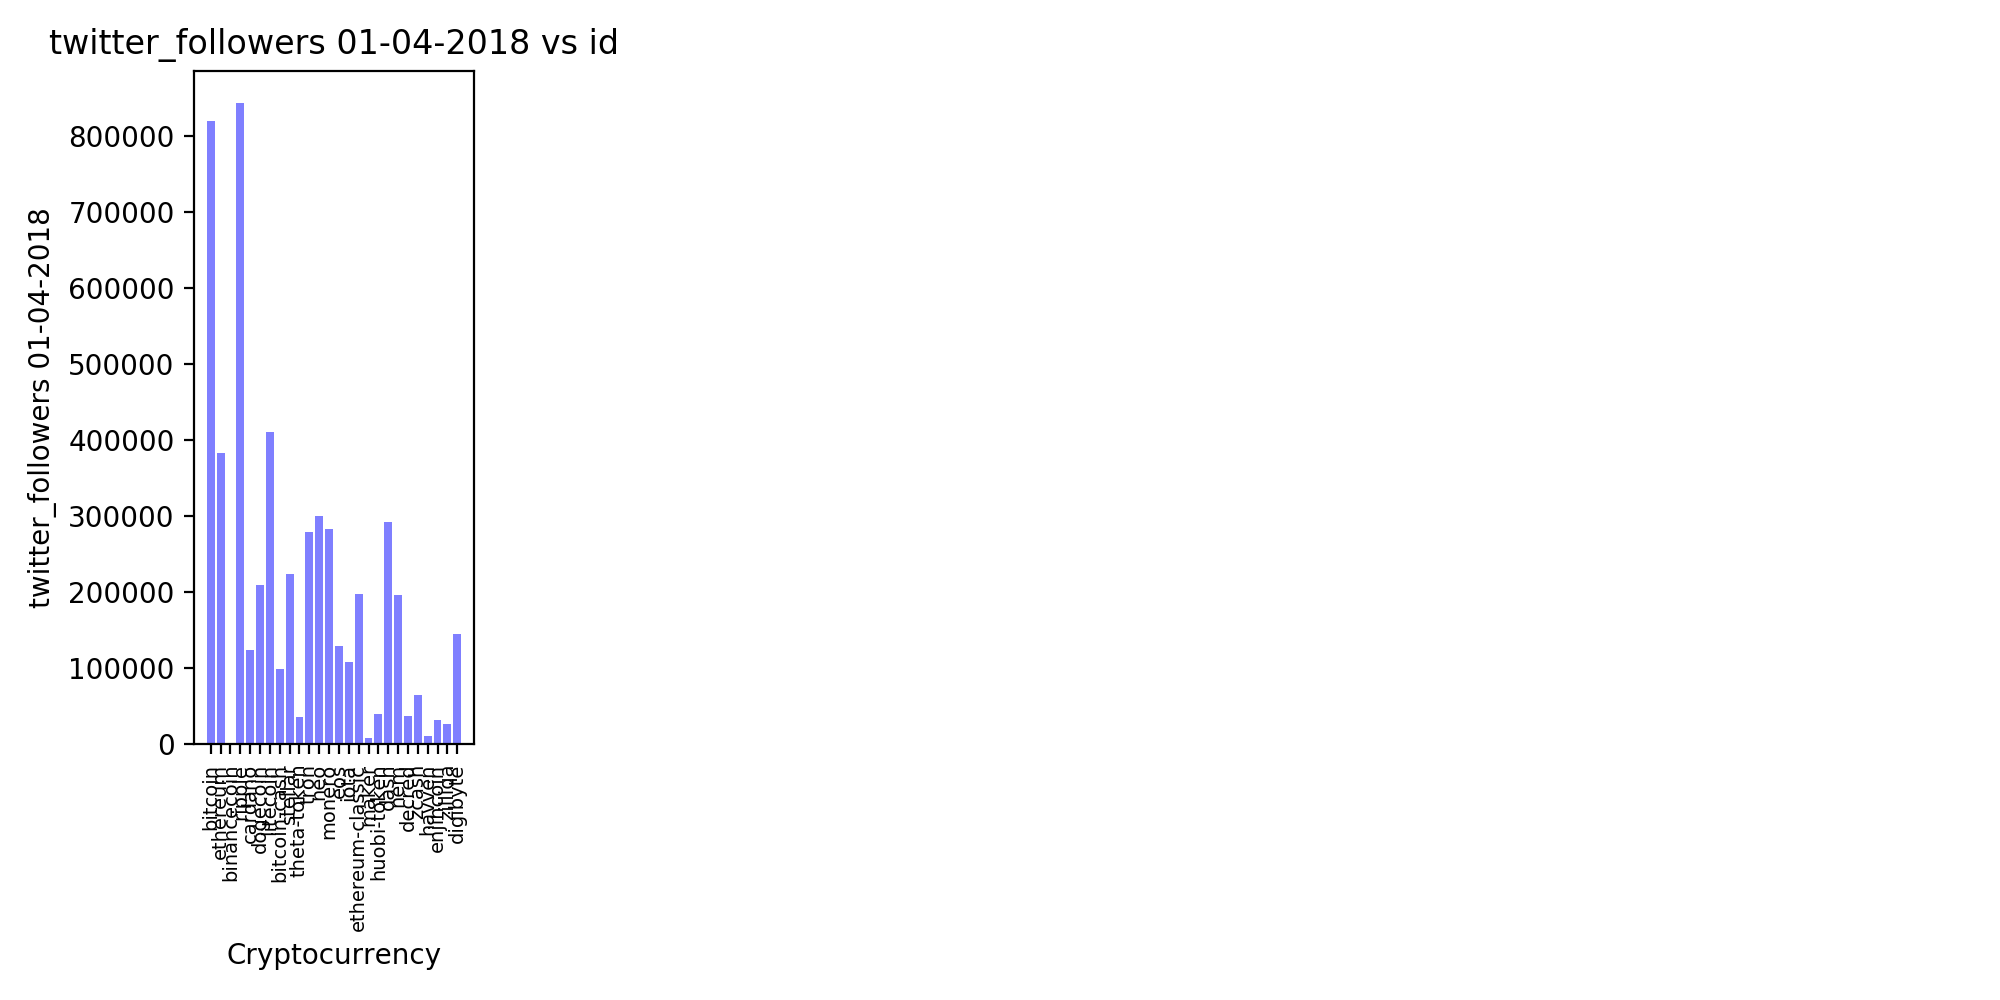

<IPython.core.display.Javascript object>


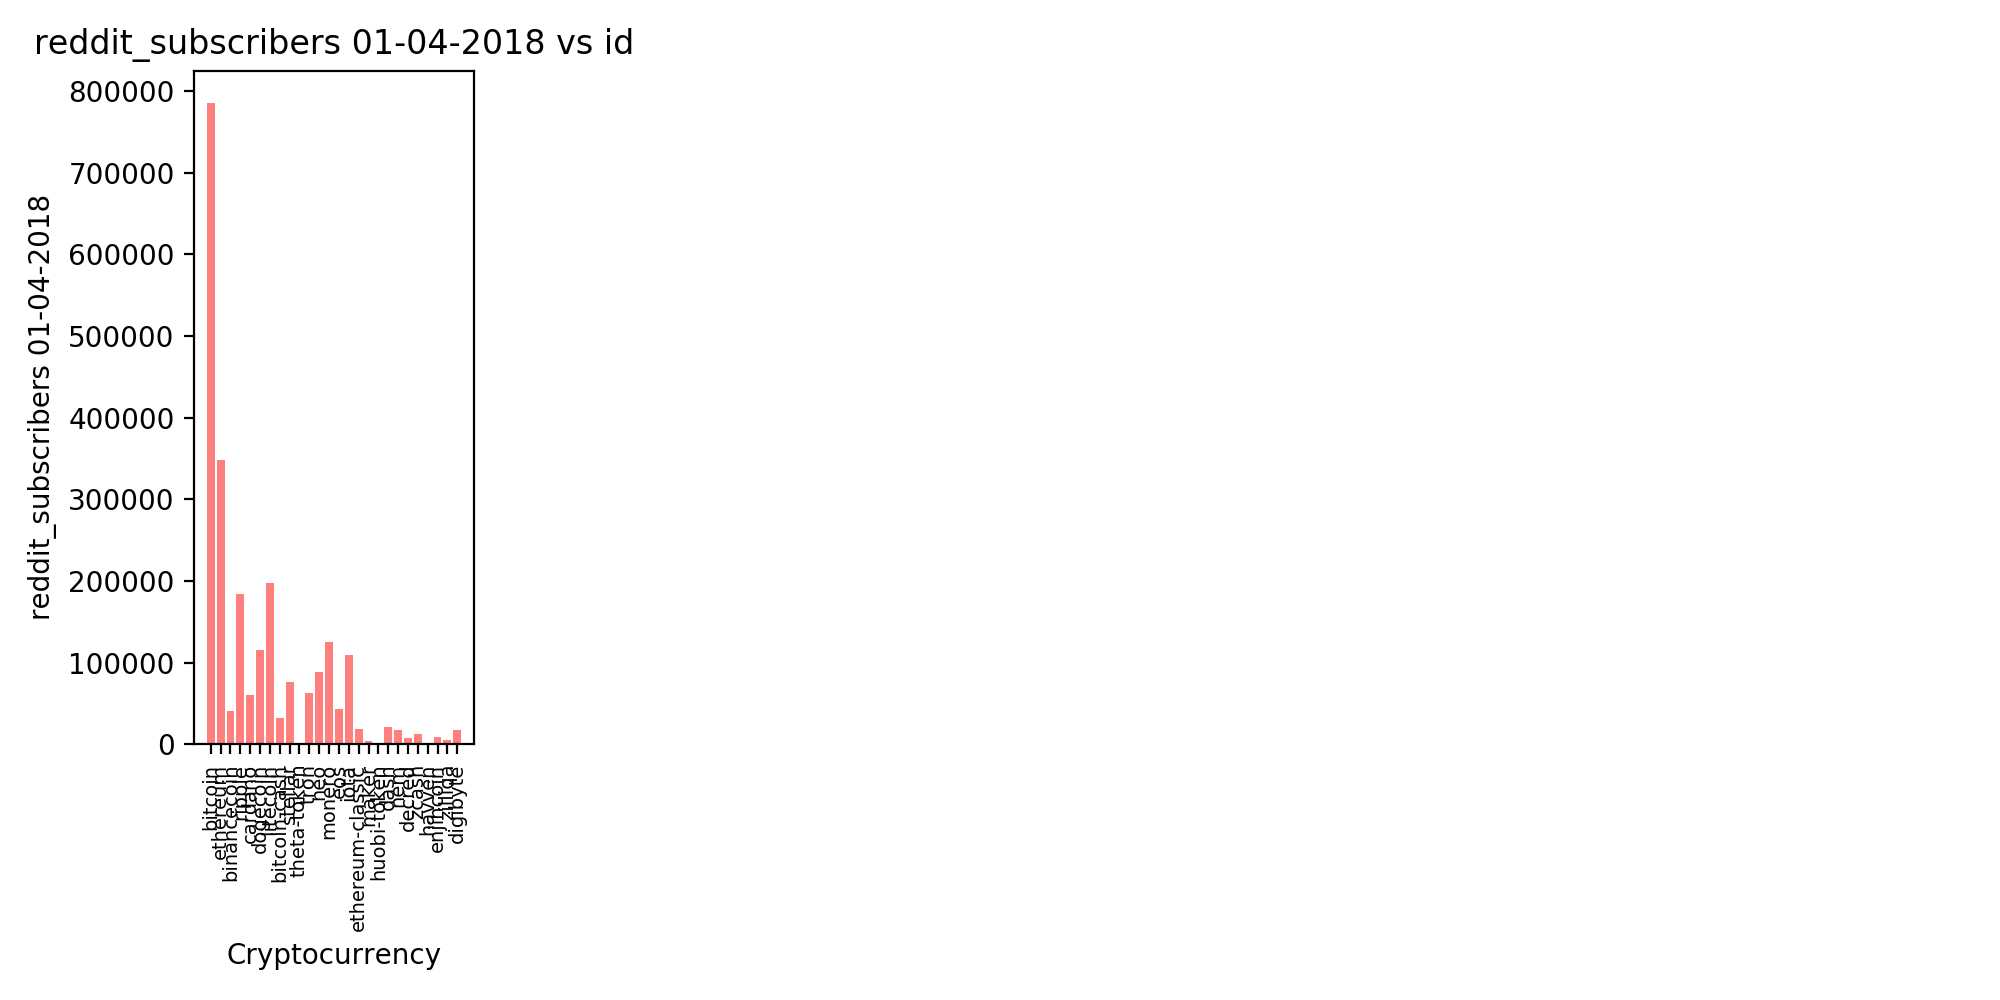

<IPython.core.display.Javascript object>


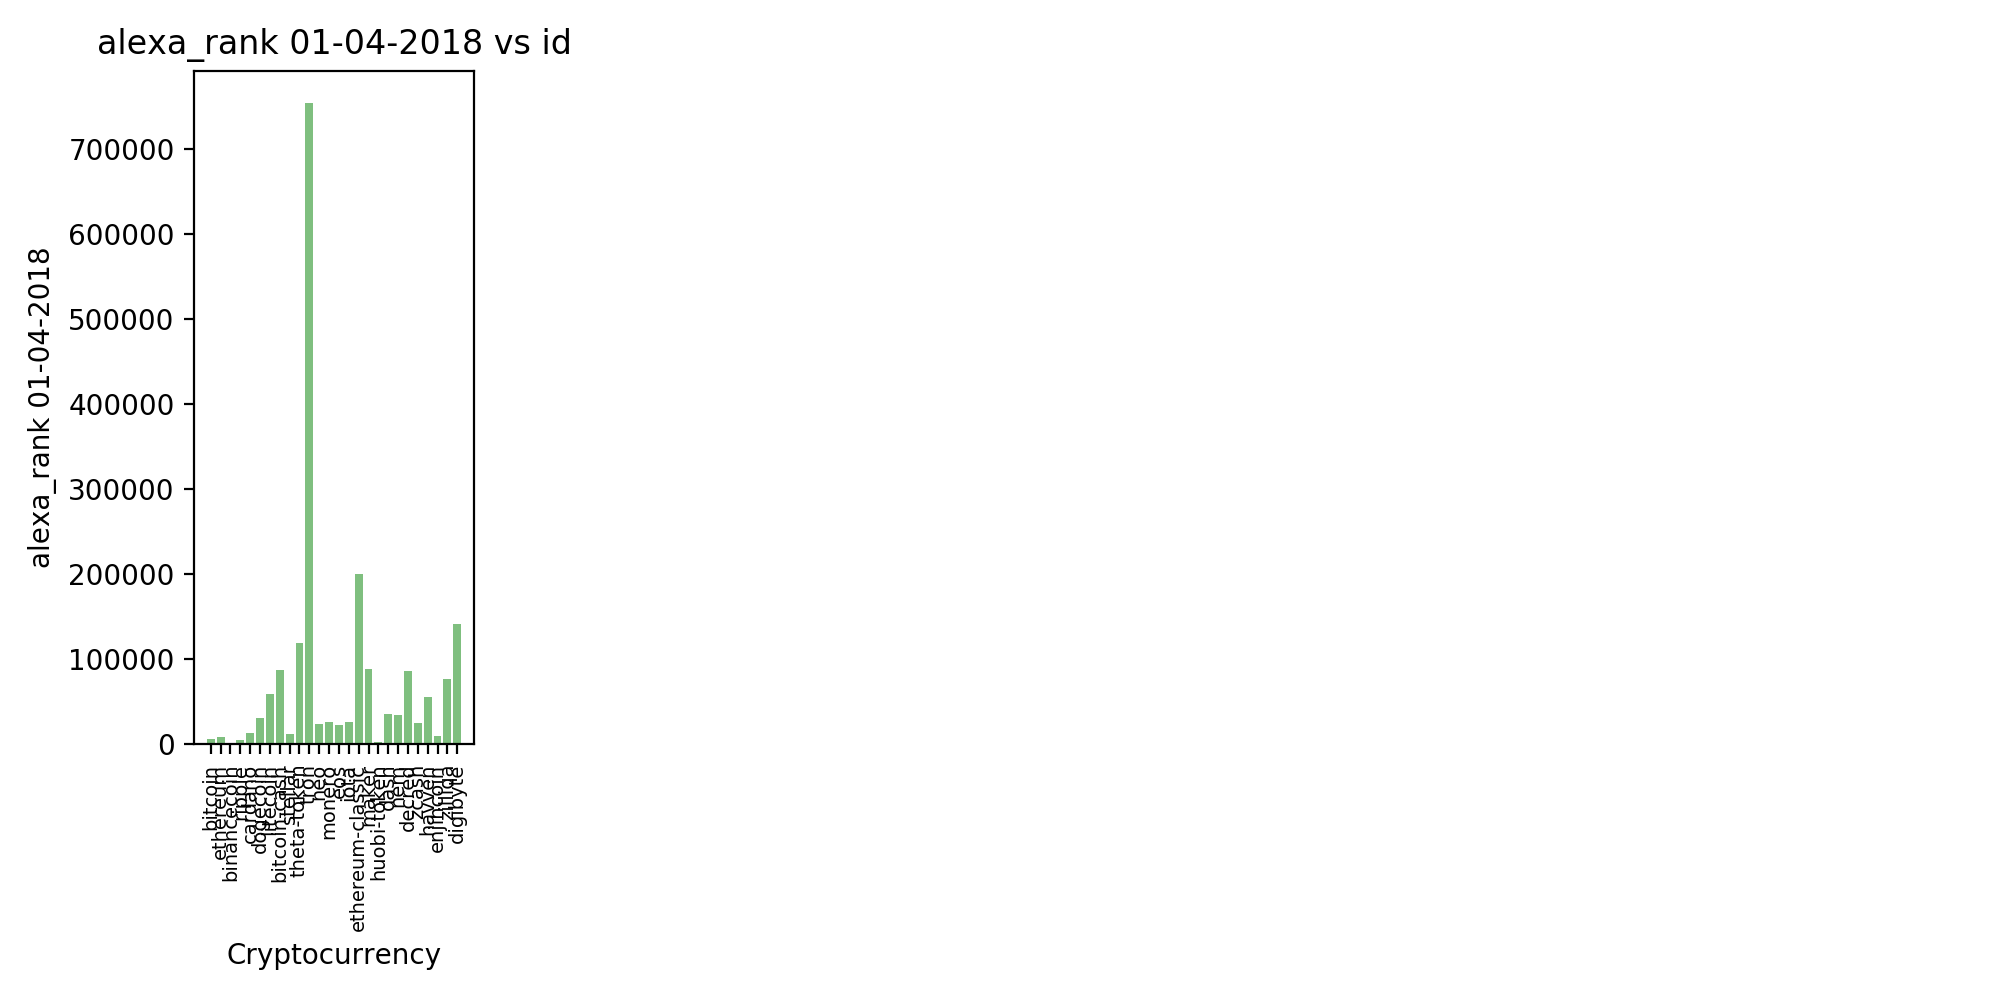

In [201]:
# What is the relationship between social media activity and market cap?
# Make a graph for twitter followers

twitter_metrics = bar_plot(clean_2018_df, 'id', 'twitter_followers 01-04-2018')
# Save the image
plt.savefig("crypto_twitter_2018.png")
# Make graph for reddit users
reddit_metrics = bar_plot(clean_2018_df,'id', 'reddit_subscribers 01-04-2018', 'red')
# Save the image
plt.savefig("crypto_reddit_2018.png")
alexa_metrics = bar_plot(clean_2018_df, 'id', 'alexa_rank 01-04-2018', 'green')
# Save the image
plt.savefig("crypto_alexa_rank_2018.png")

In [ ]:
# Make empty list for 2021
coin_data_2021 = []
# use function to get requests based on date and append them to list
obtain_metrics_by_date(coin_data_2021, '01-04-2021')

In [ ]:
coin_data_2021

In [ ]:
_2021_df = pd.DataFrame(coin_data_2021)
len(_2021_df)

In [ ]:
clean_2021_df = _2021_df.dropna()

In [ ]:
len(clean_2021_df)

In [ ]:
bar_plot(clean_2021_df, 'id', 'reddit_subscribers 01-04-2021', 'r')
plt.savefig("images/crypto_reddit_2018.png")

In [ ]:
bar_plot(clean_2021_df, 'id', 'twitter_followers 01-04-2021') 
plt.savefig("images/crypto_twitter_2021.png")

In [ ]:
bar_plot(clean_2021_df, 'id', 'alexa_rank 01-04-2021', 'g')
plt.savefig("images/crypto_alexa_rank_2021.png")

In [ ]:
# merge both data frames to get full picture of social metrics between 2018 and 2021
social_metrics_merged_df = pd.merge(clean_2018_df, clean_2021_df,on="id", how="right")
#social_metrics_merged_df.dropna(inplace=True)
social_metrics_merged_df.head()

In [ ]:
clean_social_metrics_merged_df = social_metrics_merged_df.dropna()
clean_social_metrics_merged_df.head()

In [182]:
# create a function to do a scatter plot
def scatter_plot(dataframe, x_values, y_values, fig_size=[9,5], color='red', edgecolor='black', marker='o'):

    plt.figure(figsize = fig_size)
    x_axis = dataframe[f"{x_values}"]
    y_axis = dataframe[f"{y_values}"]
    plt.scatter(x_axis, y_axis, color=f"{color}", edgecolor=f"{edgecolor}", marker=f"{marker}")
    plt.xlabel(f"{x_axis.name}")
#    plt.ylim((min(dataframe[f"{y_values}"]) * (-1.5)), (max(dataframe[f"{y_values}"]) * 1.1))
    plt.ylabel(f"{y_axis.name}")
    plt.tight_layout()
    plt.show()
#    print(plt.ylim(min(dataframe[f"{y_values}"]), max(dataframe[f"{y_values}"])))
    


In [ ]:
#(min(dataframe[f"{y_values}"]) *.5)
#(max(dataframe[f"{y_values}"]) * 2)

In [167]:
max(clean_social_metrics_merged_df['price 01-04-2018'])*1.1

7672.802845422836

<IPython.core.display.Javascript object>


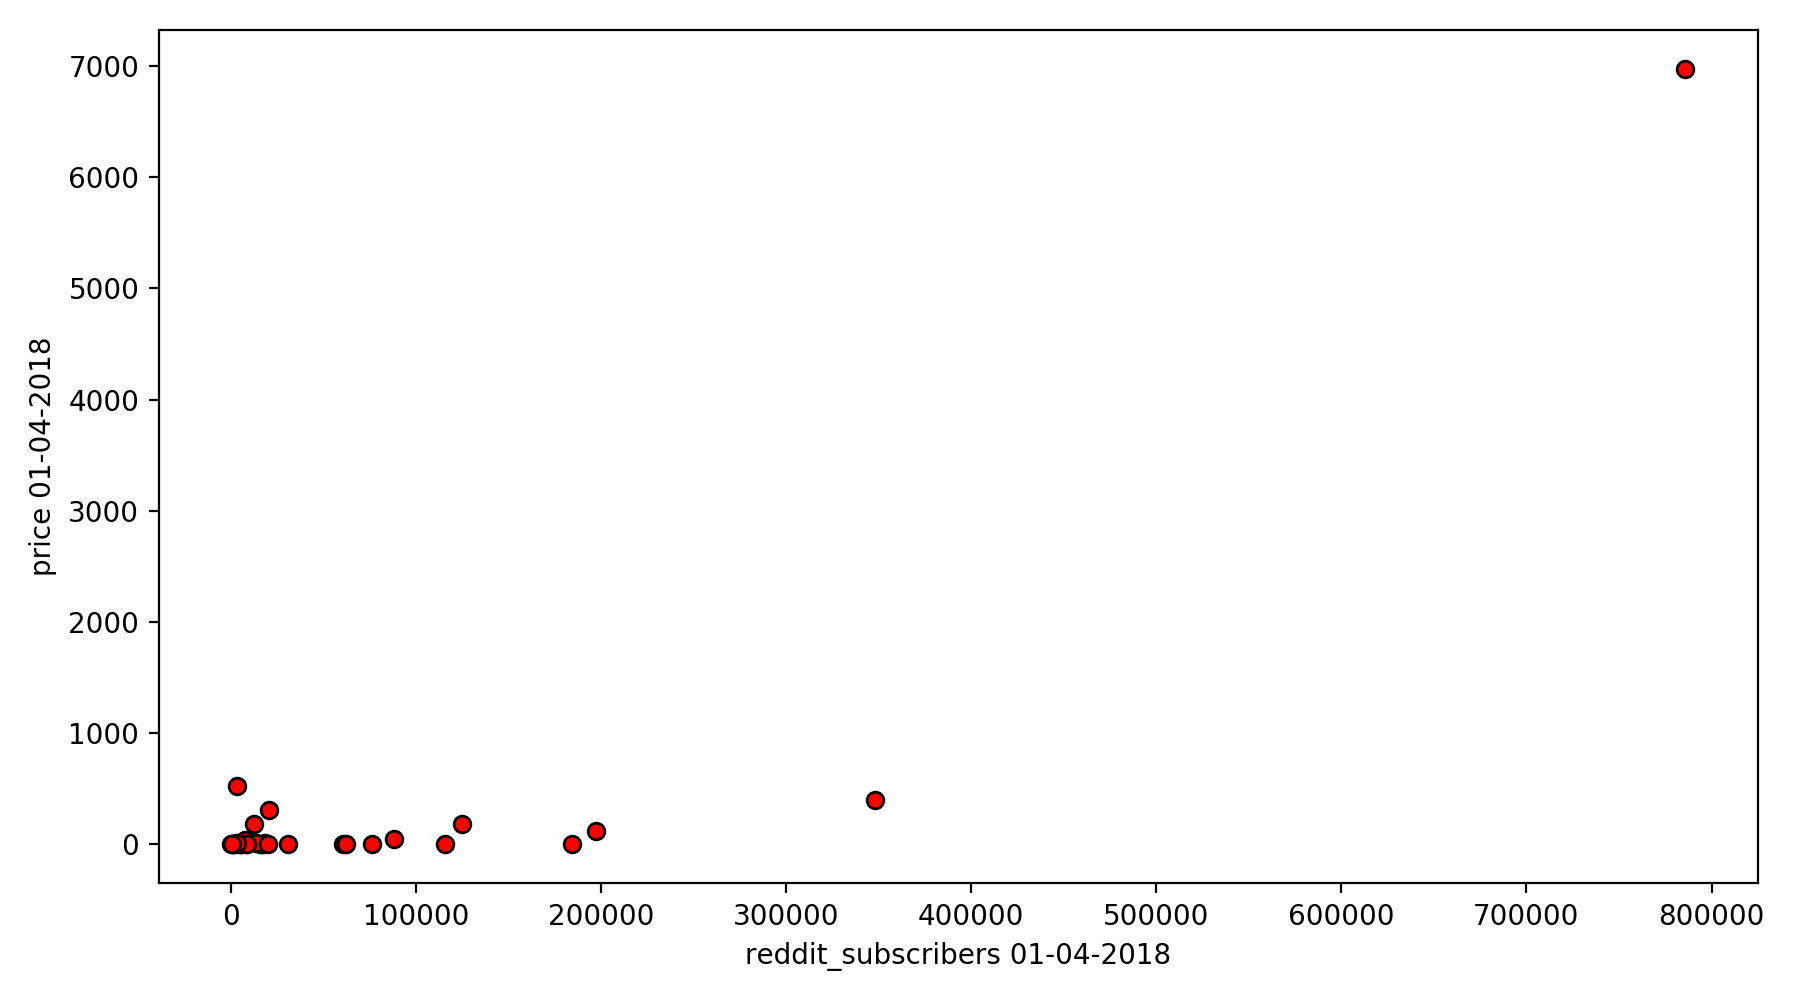

In [183]:
scatter_plot(clean_social_metrics_merged_df, 'reddit_subscribers 01-04-2018', 'price 01-04-2018')
#plt.savefig("images/reddit_vs_price_2018.png")

In [ ]:
scatter_plot(clean_social_metrics_merged_df, "twitter_followers 01-04-2018", "price 01-04-2018", fig_size = [10,5], color='b')

In [ ]:
social_metrics_merged_df.columns

In [ ]:
scatter_plot(social_metrics_merged_df,'price 01-04-2018','alexa_rank 01-04-2018', color='g')

In [ ]:
clean_2018_df.columns

In [ ]:
scatter_plot(clean_2018_df, 'price 01-04-2018', 'reddit_subscribers 01-04-2018')